In [25]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with zipfile.ZipFile('child-mind-institute-problematic-internet-use.zip') as z:
    with z.open('series_train.parquet/id=00f332d1/part-0.parquet') as f:
        #df = pd.read_csv(f)
        df_obs = pd.read_parquet(f)

df_obs    # time series data for one of the observations

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT
0,0,-0.051997,0.011325,-0.991420,0.026643,-86.152954,0.0,30.000000,4185.000000,57240000000000,1,2,14.0
1,1,-0.008801,-0.036264,-1.000591,0.001868,-87.851646,0.0,30.000000,4185.000000,57245000000000,1,2,14.0
2,2,-0.008904,-0.035101,-1.000357,0.001776,-87.853790,0.0,30.333334,4185.000000,57250000000000,1,2,14.0
3,3,-0.009110,-0.035204,-1.000435,0.001675,-87.850815,0.0,30.666666,4185.000000,57255000000000,1,2,14.0
4,4,-0.009020,-0.035204,-1.000709,0.001846,-87.850815,0.0,31.000000,4185.000000,57260000000000,1,2,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
414379,414379,0.015927,-0.021750,-0.985415,0.000000,-88.438774,1.0,0.500000,3098.833252,55535000000000,4,2,38.0
414380,414380,0.016043,-0.021879,-0.985102,0.000000,-88.445999,1.0,0.500000,3098.666748,55540000000000,4,2,38.0
414381,414381,0.015888,-0.021814,-0.985428,0.000000,-88.451225,1.0,0.500000,3098.500000,55545000000000,4,2,38.0
414382,414382,0.016352,-0.021762,-0.985741,0.000000,-88.456245,1.0,0.500000,3098.333252,55550000000000,4,2,38.0


In [3]:
with zipfile.ZipFile('child-mind-institute-problematic-internet-use.zip') as z:
    with z.open('data_dictionary.csv') as f:
        df_desc = pd.read_csv(f)

df_desc         # description of all the features

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
...,...,...,...,...,...,...
76,Sleep Disturbance Scale,SDS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
77,Sleep Disturbance Scale,SDS-SDS_Total_Raw,Total Raw Score,int,NaN,NaN
78,Sleep Disturbance Scale,SDS-SDS_Total_T,Total T-Score,int,NaN,NaN
79,Internet Use,PreInt_EduHx-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [4]:
with zipfile.ZipFile('child-mind-institute-problematic-internet-use.zip') as z:
    with z.open('train.csv') as f:
        df = pd.read_csv(f)

df            # non-timeseries data for the observations, our main training set

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [93]:
with zipfile.ZipFile('child-mind-institute-problematic-internet-use.zip') as z:
    with z.open('test.csv') as f:
        df_test = pd.read_csv(f)

df_test            # sample test set

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,...,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
with zipfile.ZipFile('child-mind-institute-problematic-internet-use.zip') as z:
    with z.open('sample_submission.csv') as f:
        submission = pd.read_csv(f)

submission            # sample submission to the Kaggle competition

,id,sii
0,00008ff9,0
1,000fd460,1
2,00105258,2
3,00115b9f,3
4,0016bb22,0
5,001f3379,1
6,0038ba98,2
7,0068a485,3
8,0069fbed,0
9,0083e397,1


In [5]:
df.shape

(3960, 82)

In [6]:
df.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

### Investigation of Missing Values

In [7]:
df.isnull().sum().sum()

131717

We have 131717 missing values!!!!! Not looking good for the data.

In [9]:
df.isnull().sum().sum() / (df.shape[0] * df.shape[1])

0.4056325449618133

Almost half of the data is `NaN` 

In [8]:
df.dropna() 

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii


Every row has a missing value...  
Dropping rows with missing values is impossible...

In [10]:
# df.iloc[0][df.iloc[0].isnull()].index.tolist()
print(df.shape)
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

(3960, 82)


PAQ_A-PAQ_A_Total                         3485
PAQ_A-Season                              3485
Fitness_Endurance-Time_Mins               3220
Fitness_Endurance-Time_Sec                3220
Fitness_Endurance-Max_Stage               3217
                                          ... 
Physical-Weight                            884
PreInt_EduHx-computerinternet_hoursday     659
Physical-Season                            650
FGC-Season                                 614
PreInt_EduHx-Season                        420
Length: 78, dtype: int64

78 of the 82 columns have a missing value in them. Moreover, there's no columns with all 3960 rows having missing values. In other words, every row has a missing value for different reasons...

### It's clear that imputing is a must...

In [11]:
df.isnull().sum(axis=1).sort_values(ascending=False)

1172    78
1487    78
2130    78
3019    78
2137    78
        ..
2121     3
2941     3
2920     3
434      3
2411     3
Length: 3960, dtype: int64

Some rows have 78 missing values!!! We most likely must drop those rows.

In [12]:
len(df.isnull().sum(axis=1)[df.isnull().sum(axis=1) > 70])

696

Maybe drop all rows with more than 70 missing values? Just an idea for now.

### Investigation of Categorical Columns

In [13]:
df.dtypes

id                                         object
Basic_Demos-Enroll_Season                  object
Basic_Demos-Age                             int64
Basic_Demos-Sex                             int64
CGAS-Season                                object
                                           ...   
SDS-SDS_Total_Raw                         float64
SDS-SDS_Total_T                           float64
PreInt_EduHx-Season                        object
PreInt_EduHx-computerinternet_hoursday    float64
sii                                       float64
Length: 82, dtype: object

Already, we can see there's some columns that are `object` type (categorical)

In [14]:
print(df.dtypes.index[(df.dtypes != 'float64') & (df.dtypes != 'int64')])
print(df.dtypes[(df.dtypes != 'float64') & (df.dtypes != 'int64')])

Index(['id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
       'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
       'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season'],
      dtype='object')
id                           object
Basic_Demos-Enroll_Season    object
CGAS-Season                  object
Physical-Season              object
Fitness_Endurance-Season     object
FGC-Season                   object
BIA-Season                   object
PAQ_A-Season                 object
PAQ_C-Season                 object
PCIAT-Season                 object
SDS-Season                   object
PreInt_EduHx-Season          object
dtype: object


In [15]:
df[['id']].head()

,id
0,00008ff9
1,000fd460
2,00105258
3,00115b9f
4,0016bb22


In [16]:
df[['Basic_Demos-Enroll_Season']].head()

,Basic_Demos-Enroll_Season
0,Fall
1,Summer
2,Summer
3,Winter
4,Spring


Thankfully, this is as expected. We see that the ids are `object`s because they are hexstrings.  
The other `object` columns are categorical because they are **Season** data.  
It's probably safest to one-hot-encode the seasons, since it's cyclical data (Fall -> Winter -> Spring -> Summer -> Fall)  

### Investigation of Outliers

In [17]:
df.describe() # this describe() functions automatically excludes NaN from calculations

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000
mean,10.433586,0.372727,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,3.574648,0.483591,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000,23.000000,61.000000,72.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.937682,55.000000,77.000000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,13.000000,1.000000,75.000000,21.571244,62.000000,113.800000,30.000000,76.000000,90.500000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,999.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


In [18]:
df.describe().loc['min'][df.describe().loc['min'] == 0]

Basic_Demos-Sex                           0.0
Physical-BMI                              0.0
Physical-Weight                           0.0
Physical-Diastolic_BP                     0.0
Physical-Systolic_BP                      0.0
Fitness_Endurance-Max_Stage               0.0
Fitness_Endurance-Time_Mins               0.0
Fitness_Endurance-Time_Sec                0.0
FGC-FGC_CU                                0.0
FGC-FGC_CU_Zone                           0.0
FGC-FGC_GSND                              0.0
FGC-FGC_GSD                               0.0
FGC-FGC_PU                                0.0
FGC-FGC_PU_Zone                           0.0
FGC-FGC_SRL                               0.0
FGC-FGC_SRL_Zone                          0.0
FGC-FGC_SRR                               0.0
FGC-FGC_SRR_Zone                          0.0
FGC-FGC_TL                                0.0
FGC-FGC_TL_Zone                           0.0
PCIAT-PCIAT_01                            0.0
PCIAT-PCIAT_02                    

hmm... There's a lot of columns that have a minimum of 0. A `Physical-Weight` of 0 is absolute nonsense. What this tells us is that most likely, 0 for some of these columns is also an indicator of a missing value.

In [19]:
df[df['Physical-Weight'] == 0].head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
44,026102c4,Fall,7,1,Summer,66.0,Summer,NaN,NaN,0.0,...,1.0,1.0,1.0,21.0,Fall,33.0,47.0,Fall,0.0,0.0
114,0632d98a,Spring,11,0,Summer,70.0,Spring,NaN,NaN,0.0,...,1.0,1.0,1.0,17.0,Spring,33.0,47.0,Spring,0.0,0.0
202,0b6b07f6,Winter,8,1,NaN,NaN,Summer,NaN,NaN,0.0,...,1.0,0.0,0.0,26.0,Spring,32.0,46.0,Winter,NaN,0.0
223,0c83af0f,Summer,13,1,NaN,NaN,Fall,0.0,56.75,0.0,...,3.0,4.0,4.0,52.0,Fall,43.0,60.0,Summer,0.0,2.0
244,0df44f9e,Summer,15,1,Winter,65.0,Fall,NaN,NaN,0.0,...,4.0,0.0,1.0,59.0,Fall,44.0,62.0,Summer,3.0,2.0


As expected, for a physical weight of 0.0, the observations usually had missing values for BMI and Height. This means that the data recorder must've interpreted 0 as "missing value" for some columns like physical weight, so we must keep this in mind. **0 can mean NaN, and we'll have to probably impute.**

We also can see that `BMI` has a max of 59, which is most certainly an outlier.

In [20]:
df[df['Physical-BMI'] > 59]

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
3818,f5efa540,Fall,8,0,NaN,NaN,Fall,59.132048,33.0,91.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,NaN,NaN


In [21]:
df[df['Physical-BMI'] > 59].isnull().sum().sum()

56

56 missing values for the kid with 59 BMI means it's probably not a bad idea to drop this row.

In [157]:
df.shape

(3960, 82)

In [22]:
# df = df.drop(df[df['Physical-BMI'] > 59].index) maybe do this in preprocessing step

In [169]:
df.shape

(3959, 82)

Repeat the dropping of outliers for the other columns in the data preprocessing step

### Data Visualization

In [23]:
df.shape

(3960, 82)

In [26]:
corr = df.drop(columns=df.dtypes.index[(df.dtypes != 'float64') & (df.dtypes != 'int64')]).corr()

<Axes: >

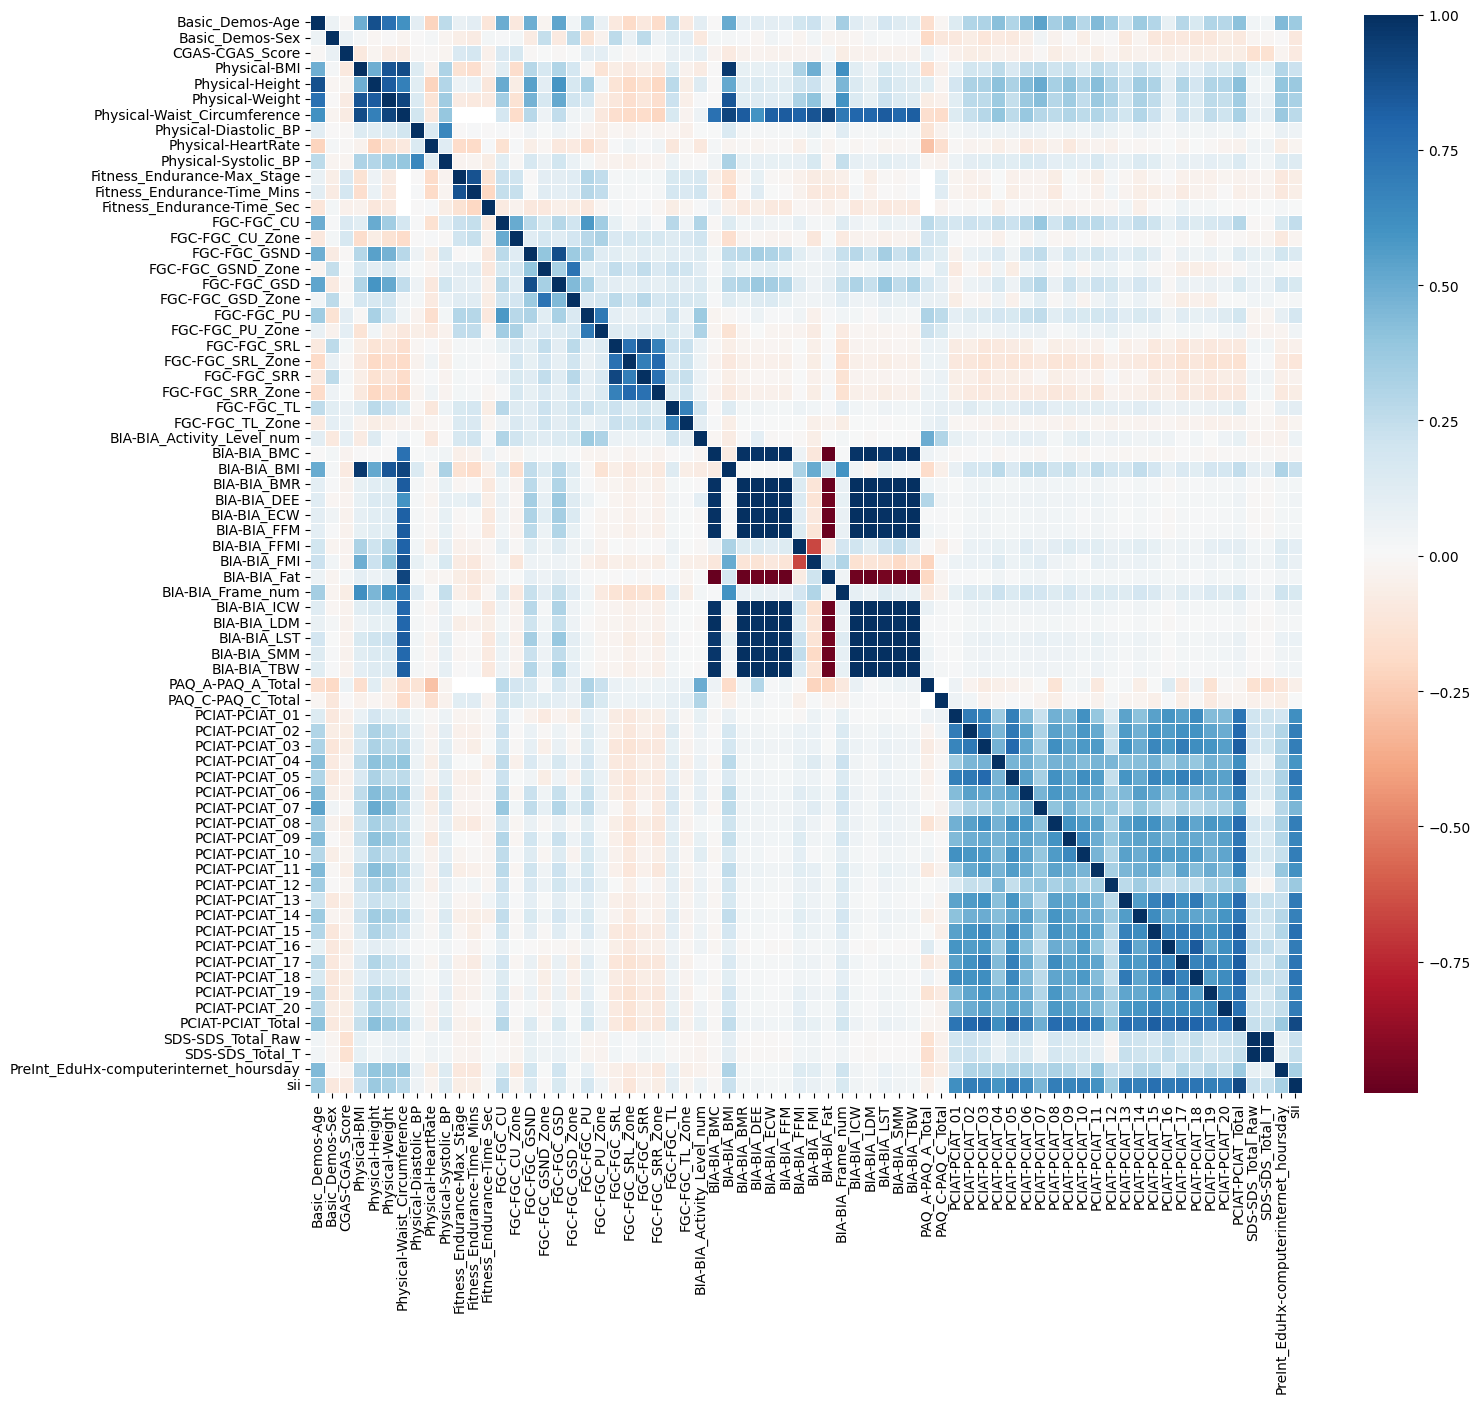

In [53]:
# sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='RdBu', xticklabels=True, yticklabels=True)
# sns.heatmap(corr)
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(corr, cmap='RdBu', ax=ax, xticklabels=True, yticklabels=True, linewidths=0.5)

A good chunk of the heatmap is light-colored (low correlation between features), which is good, but there are also some significant correlations that we can observe here:
* BMI, Height, Weight, Waist Circumference are correlated (makes sense)
* Some correlation between FGC (FitnessGramChild) values
* Interesting correlation between waist circumference and BIA (Bio-electric Impedance Analysis) values
* Extreme correlation between BIA values (probably related to each other by a math formula)
* Some correlation between PCIAT (Parent-Child Internet Addiction Test) scores (the test has 20 aspects)

In [87]:
df_desc[['BIA' in x for x in df_desc['Field']]][['Instrument','Field','Description']].head()

,Instrument,Field,Description
33,Bio-electric Impedance Analysis,BIA-Season,Season of participation
34,Bio-electric Impedance Analysis,BIA-BIA_Activity_Level_num,Activity Level
35,Bio-electric Impedance Analysis,BIA-BIA_BMC,Bone Mineral Content
36,Bio-electric Impedance Analysis,BIA-BIA_BMI,Body Mass Index
37,Bio-electric Impedance Analysis,BIA-BIA_BMR,Basal Metabolic Rate


In [88]:
df_desc[['FGC' in x for x in df_desc['Field']]][['Instrument', 'Field','Description']].head()

,Instrument,Field,Description
18,FitnessGram Child,FGC-Season,Season of participation
19,FitnessGram Child,FGC-FGC_CU,Curl up total
20,FitnessGram Child,FGC-FGC_CU_Zone,Curl up fitness zone
21,FitnessGram Child,FGC-FGC_GSND,Grip Strength total (non-dominant)
22,FitnessGram Child,FGC-FGC_GSND_Zone,Grip Strength fitness zone (non-dominant)


In [89]:
df_desc[['PCIAT' in x for x in df_desc['Field']]][['Instrument', 'Field','Description']].head()

,Instrument,Field,Description
54,Parent-Child Internet Addiction Test,PCIAT-Season,Season of participation
55,Parent-Child Internet Addiction Test,PCIAT-PCIAT_01,How often does your child disobey time limits ...
56,Parent-Child Internet Addiction Test,PCIAT-PCIAT_02,How often does your child neglect household ch...
57,Parent-Child Internet Addiction Test,PCIAT-PCIAT_03,How often does your child prefer to spend time...
58,Parent-Child Internet Addiction Test,PCIAT-PCIAT_04,How often does your child form new relationshi...


In [62]:
df.iloc[:,54:76]

,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,...,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total
0,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,...,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0
1,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,...,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0
3,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,...,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,Winter,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,...,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.0
3956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3957,Winter,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,...,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0
3958,Spring,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,19.0


PCIAT goes from 1 to 20; as said on `Kaggle`: the PCIAT is
>20-item scale that measures characteristics and behaviors associated with compulsive use of the Internet including compulsivity, escapism, and dependency.

The 20 PCIAT scores are summed, and note that the `sii` is determined from the total. From Kaggle:
> Note in particular the field PCIAT-PCIAT_Total. The target sii for this competition is derived from this field as described in the data dictionary: 0 for None, 1 for Mild, 2 for Moderate, and 3 for Severe.

In [86]:
with pd.option_context('display.max_colwidth', 400):
    display(df_desc[df_desc['Field'] == 'PCIAT-PCIAT_Total'][['Field','Value Labels']])

,Field,Value Labels
75,PCIAT-PCIAT_Total,Severity Impairment Index: 0-30=None; 31-49=Mild; 50-79=Moderate; 80-100=Severe


array([[<Axes: title={'center': 'Basic_Demos-Age'}>,
        <Axes: title={'center': 'Basic_Demos-Sex'}>,
        <Axes: title={'center': 'CGAS-CGAS_Score'}>,
        <Axes: title={'center': 'Physical-BMI'}>,
        <Axes: title={'center': 'Physical-Height'}>,
        <Axes: title={'center': 'Physical-Weight'}>,
        <Axes: title={'center': 'Physical-Waist_Circumference'}>,
        <Axes: title={'center': 'Physical-Diastolic_BP'}>],
       [<Axes: title={'center': 'Physical-HeartRate'}>,
        <Axes: title={'center': 'Physical-Systolic_BP'}>,
        <Axes: title={'center': 'Fitness_Endurance-Max_Stage'}>,
        <Axes: title={'center': 'Fitness_Endurance-Time_Mins'}>,
        <Axes: title={'center': 'Fitness_Endurance-Time_Sec'}>,
        <Axes: title={'center': 'FGC-FGC_CU'}>,
        <Axes: title={'center': 'FGC-FGC_CU_Zone'}>,
        <Axes: title={'center': 'FGC-FGC_GSND'}>],
       [<Axes: title={'center': 'FGC-FGC_GSND_Zone'}>,
        <Axes: title={'center': 'FGC-FGC_GSD

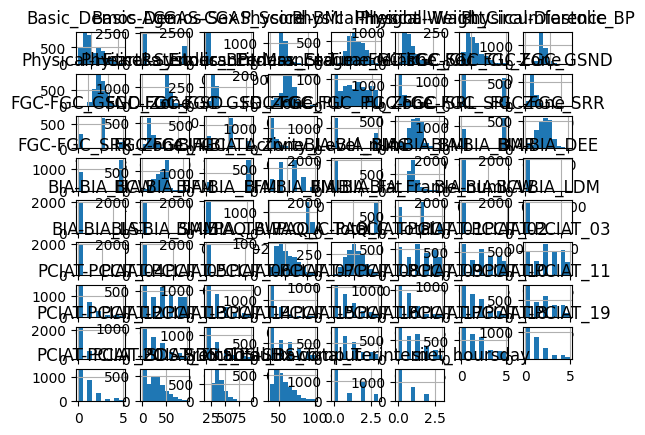

In [132]:
df.hist()